In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [9]:
df = pd.read_csv("CLEANED_WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)

In [11]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.67      0.55      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



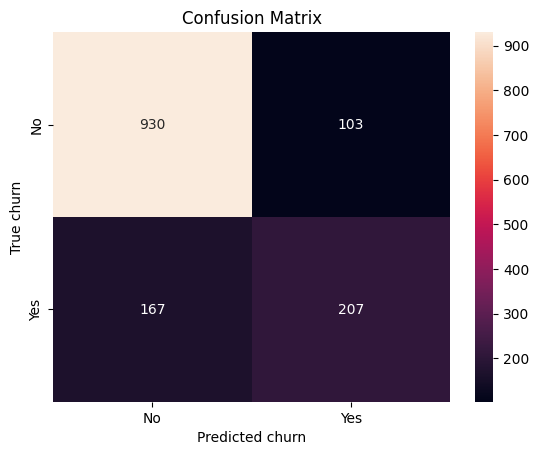

In [12]:
cmat = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cmat, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted churn")
plt.ylabel("True churn")
plt.title("Confusion Matrix")
plt.show()

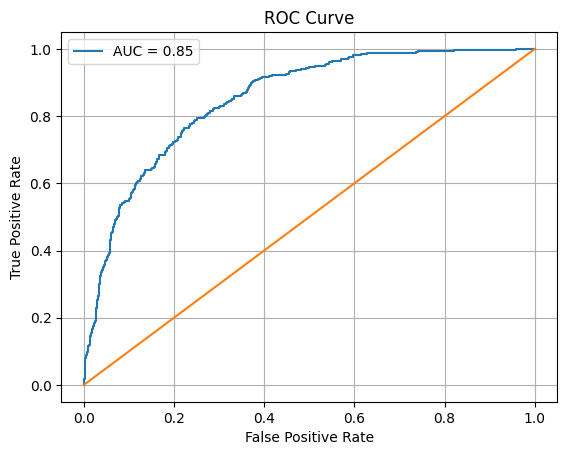

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(key=abs, ascending=False)

print("Feature Importance")
print("------------------")
print(feature_importance.head(20))

Feature Importance
------------------
tenure                           -1.482841
TotalCharges                      0.780239
Contract_Two year                -0.516146
InternetService_No               -0.299433
Contract_One year                -0.294482
InternetService_Fiber optic       0.278614
PhoneService                     -0.204600
TechSupport                      -0.203563
OnlineSecurity                   -0.187492
PaymentMethod_Electronic check    0.180636
PaperlessBilling                  0.157804
MonthlyCharges                    0.122239
OnlineBackup                     -0.113422
MultipleLines                     0.098484
SeniorCitizen                     0.078848
Dependents                       -0.067705
StreamingTV                       0.063801
StreamingMovies                   0.058813
DeviceProtection                 -0.047579
gender                           -0.040050
dtype: float64


In [61]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1)
model_l1.fit(X_train_scaled, y_train)

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1, max_iter=1000)
model_l2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [62]:
y_pred1 = model_l1.predict(X_test_scaled)
y_prob1 = model_l1.predict_proba(X_test_scaled)[:, 1]

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob1))

[[930 103]
 [168 206]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.67      0.55      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC AUC Score: 0.8516961655735074


In [63]:
y_pred2 = model_l2.predict(X_test_scaled)
y_prob2 = model_l2.predict_proba(X_test_scaled)[:, 1]

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob2))

[[930 103]
 [167 207]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.67      0.55      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC AUC Score: 0.85156156980085
